In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


c:\Users\ashli\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
IMAGE_SIZE=[224,224]

In [4]:
train_path = 'C:/Users/ashli/Documents/DL/tranfer learning/Maskdata'  # Update with your training data path
test_path = 'C:/Users/ashli/Documents/DL/tranfer learning/Maskdatatest'  # Update with your testing data path


In [5]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [6]:
#Must do
for layer in vgg.layers:
  layer.trainable=False

In [7]:
x=Flatten()(vgg.output)
prediction=Dense(2,activation='softmax')(x)

In [8]:
model=Model(inputs=vgg.input,outputs=prediction)

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)
#
training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')
testing_set=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')


Found 3150 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [11]:
r=model.fit(training_set,validation_data=testing_set,epochs=5)

Epoch 1/5
76/99 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.8027 - loss: 0.4553 

c:\Users\ashli\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.9029 - loss: 0.2319 - val_accuracy: 0.9706 - val_loss: 0.0594
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.9794 - loss: 0.0610 - val_accuracy: 0.9804 - val_loss: 0.0447
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.9848 - loss: 0.0448 - val_accuracy: 0.9804 - val_loss: 0.0239
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step - accuracy: 0.9873 - loss: 0.0364 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.9924 - loss: 0.0259 - val_accuracy: 0.9902 - val_loss: 0.0213


In [12]:
r.history

{'accuracy': [0.9028571248054504,
  0.9793650507926941,
  0.9847618937492371,
  0.9873015880584717,
  0.9923809766769409],
 'loss': [0.2318546175956726,
  0.06096821278333664,
  0.04481086507439613,
  0.03643539547920227,
  0.02589922398328781],
 'val_accuracy': [0.970588207244873,
  0.9803921580314636,
  0.9803921580314636,
  1.0,
  0.9901960492134094],
 'val_loss': [0.05942542105913162,
  0.044728752225637436,
  0.023946313187479973,
  0.012712346389889717,
  0.021325815469026566]}

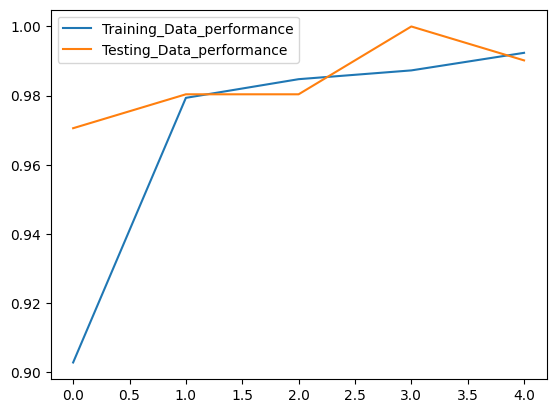

In [14]:
plt.plot(r.history['accuracy'],label='Training_Data_performance')
plt.plot(r.history['val_accuracy'],label='Testing_Data_performance')
plt.legend()
plt.show()


In [15]:
#save
model.save('model_vgg16.h5')

In [17]:
from skimage.io import imread
from skimage.transform import resize

In [18]:
def predict(imgpath,model):
    img=imread(imgpath)
    img1=resize(img,(224,224))
    img1=img1.reshape(1,224,224,3)
    pred=model.predict(img1)
    ind=pred.argmax()
    datadir=['without_mask','with_mask']
    datadir.sort()
    print(datadir[ind])

In [19]:
imgpath='C:/Users/ashli/Documents/DL/tranfer learning/Maskdatatest/with_mask/10-with-mask.jpg'

In [21]:
predict(imgpath, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
with_mask
